# Modelo
-----
## Modelo clasificador basado en técnicas lineales & árboles de decisión. 
Utilizaremos este modelo como base de comparación con modelos posteriores más complejos. 

Nos servirá este modelo también para detectar las variables más significativas para la detección de fraudes.

La entrada de este modelo será el dataset 'prepared' con los datos ya preparados para su consumición.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn import metrics


In [86]:
df = pd.read_csv("../prep/prepared.csv")
df = df.drop(columns=['Unnamed: 0'])
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrigen,diffDestino,cambioOrigen,cambioDestino
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0,-9839.64,0.00,-0.057496,0.000010
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0,-1864.28,0.00,-0.083791,0.000010
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1,-181.00,0.00,-0.153251,0.000010
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0,-181.00,-21182.00,-0.153251,-0.954918
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0,-11668.14,0.00,-0.274196,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0,-339682.13,339682.13,-0.997065,339.682140
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1,-6311409.28,0.00,-0.999842,0.000010
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0,-6311409.28,6311409.27,-0.999842,90.826229
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1,-850002.52,0.00,-0.998825,0.000010


# Modelo 1

In [87]:
train, test = train_test_split(df)
X_train = train.drop(columns=['isFraud','nameDest','nameOrig'])
y_train = train['isFraud']
X_test = test.drop(columns=['isFraud','nameDest','nameOrig'])
y_test = test['isFraud']
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrigen,diffDestino,cambioOrigen,cambioDestino
5053942,354,223753.58,507997.0,731750.58,0.00,0.00,0,1,0,0,0,0,223753.58,0.00,0.439597,0.000010
1560566,155,90415.34,36429.0,126844.34,644100.66,856594.65,0,1,0,0,0,0,90415.34,212493.99,2.415650,0.329397
526706,20,456633.98,131.0,0.00,0.00,456633.98,0,0,0,0,0,1,-131.00,456633.98,-0.115818,456.633990
1734782,161,14676.67,0.0,0.00,0.00,0.00,0,0,0,0,1,0,0.00,0.00,0.000010,0.000010
5265015,372,13165.10,0.0,0.00,0.00,0.00,0,0,0,0,1,0,0.00,0.00,0.000010,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649238,209,7331.11,0.0,0.00,0.00,0.00,0,0,0,0,1,0,0.00,0.00,0.000010,0.000010
1115035,130,111394.66,0.0,0.00,404698.68,516093.34,0,0,1,0,0,0,0.00,111394.66,0.000010,0.274575
2631648,209,132460.64,60402.0,0.00,951521.13,1083981.78,0,0,0,0,0,1,-60402.00,132460.65,-0.983714,0.139063
1076087,129,155480.19,0.0,0.00,165263.84,320744.03,0,0,1,0,0,0,0.00,155480.19,0.000010,0.935141


In [88]:
lr1 = LogisticRegression(fit_intercept=True, penalty='l2', tol=1e-5, C=20, solver='lbfgs', max_iter=120,
                       warm_start=True)
lr_default = LogisticRegression()


In [89]:

lr1.fit(X_train, y_train)
preds_train = lr1.predict(X_train)
preds_test = lr1.predict(X_test)
print('accuracy in train:', accuracy_score(preds_train, y_train))
print('accuracy in test:', accuracy_score(preds_test, y_test))

accuracy in train: 0.9982854023447364
accuracy in test: 0.9982378328424454


Text(0.5, 1.0, 'Accuracy Score: 0.9982854023447364')

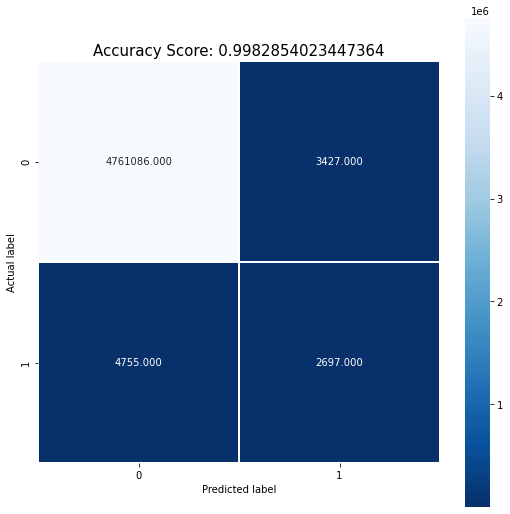

In [90]:
cmtrain1 = metrics.confusion_matrix(preds_train, y_train)
plt.figure(figsize=(9,9))
sns.heatmap(cmtrain1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(preds_train, y_train))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Accuracy Score: 0.9982378328424454')

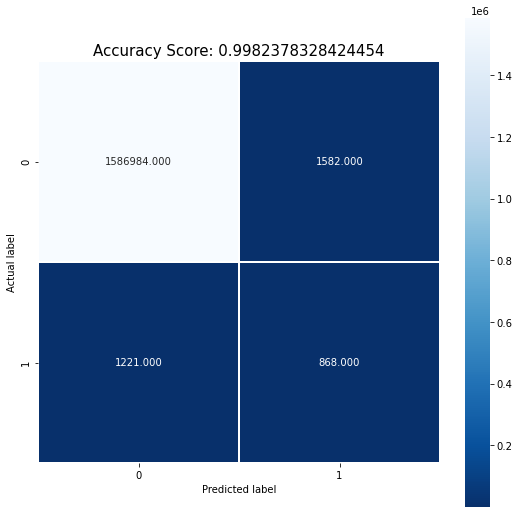

In [91]:
cmtest1 = metrics.confusion_matrix(y_test, preds_test)
plt.figure(figsize=(9,9))
sns.heatmap(cmtest1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(preds_test, y_test))
plt.title(all_sample_title, size = 15)

# Modelo 2

In [92]:
train, test = train_test_split(df[df.CASH_OUT==1])
X_train = train.drop(columns=['isFraud','nameDest','nameOrig'])
y_train = train['isFraud']
X_test = test.drop(columns=['isFraud','nameDest','nameOrig'])
y_test = test['isFraud']
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrigen,diffDestino,cambioOrigen,cambioDestino
5010113,353,208681.49,28998.51,0.00,210675.80,419357.29,0,0,1,0,0,0,-28998.51,208681.49,-0.966665,0.985854
1555304,154,137980.46,350.00,0.00,559198.57,697179.03,0,0,1,0,0,0,-350.00,137980.46,-0.259252,0.246306
5912475,404,2775.21,0.00,0.00,106725.38,109500.59,0,0,1,0,0,0,0.00,2775.21,0.000010,0.025762
2194729,185,116804.61,0.00,0.00,188503.02,305307.63,0,0,1,0,0,0,0.00,116804.61,0.000010,0.616373
3621512,274,180968.32,0.00,0.00,710117.80,891086.12,0,0,1,0,0,0,0.00,180968.32,0.000010,0.254484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667118,36,267379.45,387769.69,120390.24,367757.22,228462.20,0,0,1,0,0,0,-267379.45,-139295.02,-0.687758,-0.377742
2060660,181,188399.08,204110.00,15710.92,0.00,188399.08,0,0,1,0,0,0,-188399.08,188399.08,-0.918527,188.399090
5269320,372,70573.95,43975.00,0.00,876438.41,947012.36,0,0,1,0,0,0,-43975.00,70573.95,-0.977765,0.080432
2110400,183,430618.76,0.00,0.00,1033510.33,1464129.09,0,0,1,0,0,0,0.00,430618.76,0.000010,0.416254


In [93]:
lr2 = LogisticRegression(fit_intercept=True, penalty='l2', tol=1e-5, C=20, solver='lbfgs', max_iter=120,
                       warm_start=True)
lr_default = LogisticRegression()


In [94]:

lr2.fit(X_train, y_train)
preds_train = lr2.predict(X_train)
preds_test = lr2.predict(X_test)
print('accuracy in train:', accuracy_score(preds_train, y_train))
print('accuracy in test:', accuracy_score(preds_test, y_test))

accuracy in train: 0.9992187709497207
accuracy in test: 0.9992670391061452


Text(0.5, 1.0, 'Accuracy Score: 0.9992187709497207')

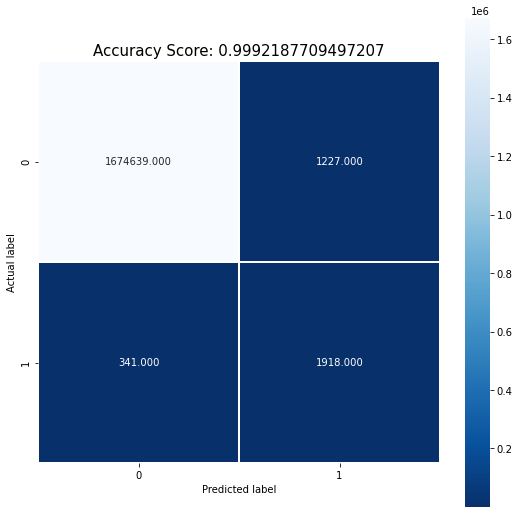

In [95]:
cmtrain2 = metrics.confusion_matrix(preds_train, y_train)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(preds_train, y_train))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Accuracy Score: 0.9992670391061452')

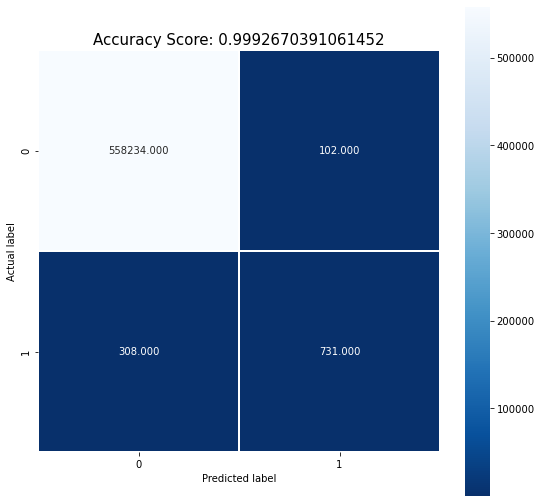

In [96]:
cmtest2 = metrics.confusion_matrix(y_test, preds_test)
plt.figure(figsize=(9,9))
sns.heatmap(cmtest2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(preds_test, y_test))
plt.title(all_sample_title, size = 15)

# Modelo 3

In [97]:
train, test = train_test_split(df[df.TRANSFER==1])
X_train = train.drop(columns=['isFraud','nameDest','nameOrig'])
y_train = train['isFraud']
X_test = test.drop(columns=['isFraud','nameDest','nameOrig'])
y_test = test['isFraud']
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrigen,diffDestino,cambioOrigen,cambioDestino
1535557,154,14467.24,0.0,0.0,393416.35,407883.59,0,0,0,0,0,1,0.0,14467.24,0.000010,0.036680
2413179,202,78197.27,0.0,0.0,317690.97,395888.24,0,0,0,0,0,1,0.0,78197.27,0.000010,0.245370
1607766,156,1533769.14,145.0,0.0,9862925.84,11396694.98,0,0,0,0,0,1,-145.0,1533769.14,-0.126629,0.155493
4793339,345,4553903.87,0.0,0.0,19942138.56,24496042.43,0,0,0,0,0,1,0.0,4553903.87,0.000010,0.228344
3140706,236,186204.26,0.0,0.0,520366.05,706570.31,0,0,0,0,0,1,0.0,186204.26,0.000010,0.357147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521059,20,181204.69,0.0,0.0,262014.04,443218.72,0,0,0,0,0,1,0.0,181204.68,0.000010,0.688954
2206905,186,267322.98,21597.0,0.0,286738.64,554061.62,0,0,0,0,0,1,-21597.0,267322.98,-0.955746,0.929048
3779512,280,230236.07,125146.0,0.0,367151.17,597387.24,0,0,0,0,0,1,-125146.0,230236.07,-0.992073,0.625385
1830404,163,780272.13,552.0,0.0,2680801.78,3461073.91,0,0,0,0,0,1,-552.0,780272.13,-0.355664,0.290951


In [98]:
lr3 = LogisticRegression(fit_intercept=True, penalty='l2', tol=1e-5, C=20, solver='lbfgs', max_iter=120,
                       warm_start=True)
lr_default = LogisticRegression()


In [99]:

lr3.fit(X_train, y_train)
preds_train = lr3.predict(X_train)
preds_test = lr3.predict(X_test)
print('accuracy in train:', accuracy_score(preds_train, y_train))
print('accuracy in test:', accuracy_score(preds_test, y_test))

accuracy in train: 0.9990692577330421
accuracy in test: 0.9991143002972348


Text(0.5, 1.0, 'Accuracy Score: 0.9990692577330421')

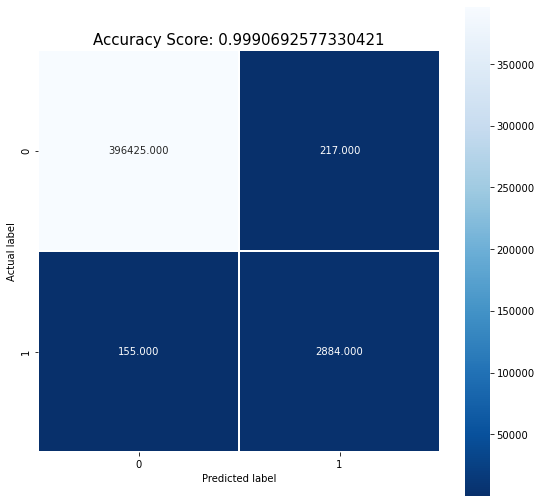

In [100]:
cmtrain3 = metrics.confusion_matrix(preds_train, y_train)
plt.figure(figsize=(9,9))
sns.heatmap(cmtrain3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(preds_train, y_train))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Accuracy Score: 0.9991143002972348')

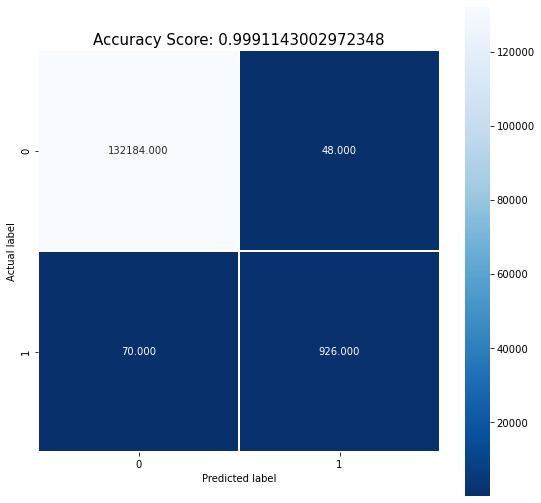

In [101]:
cmtest3 = metrics.confusion_matrix(y_test, preds_test)
plt.figure(figsize=(9,9))
sns.heatmap(cmtest3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(preds_test, y_test))
plt.title(all_sample_title, size = 15)

# Modelo 2 + 3

Text(0.5, 1.0, 'CM Modelos 2 y 3')

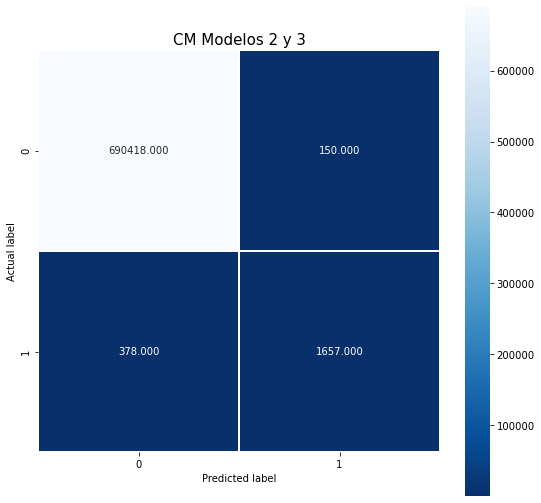

In [105]:
plt.figure(figsize=(9,9))
sns.heatmap(cmtest3+cmtest2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = ('CM Modelos 2 y 3')
plt.title(all_sample_title, size = 15)

In [117]:
cmtest23=cmtest2+cmtest3
TP1 = cmtest1[1][1]/(cmtest1[0][1]+cmtest1[1][1])
TP2 = cmtest2[1][1]/(cmtest2[0][1]+cmtest2[1][1])
TP3 = cmtest3[1][1]/(cmtest3[0][1]+cmtest3[1][1])
TP23 = cmtest23[1][1]/(cmtest23[0][1]+cmtest23[1][1])

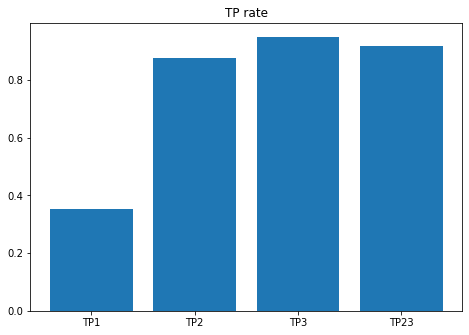

In [120]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['TP1', 'TP2', 'TP3', 'TP23']
values = [TP1,TP2,TP3,TP23]
ax.bar(names,values)
ax.set_title('TP rate')
plt.show()